In [1]:
#Hack to fix missing PROJ4 env var
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# function to read lat/lon for companies - should have imported the .py file but...
def read_tech_companies():
    ''' Data frame of 10 tech companies
    return pd.DataFrame(tech_company_name, lattitude, longitude)
    '''
    companies = pd.read_csv("tech_companies.csv")
    companies.drop(['ADDRESS'], axis=1, inplace=True)
    
    return(companies)

In [13]:
# function to read lat/lon for stations - should have imported the .py file but...

def read_mta_stations():
    ''' Read the MTA master list into a pd.DataFrame (Put the CSV file on the repository!!)
    data source = https://data.cityofnewyork.us/Transportation/Subway-Stations/arq3-7z49 (export data as csv)
    '''
    df = pd.read_csv("mta_stations.csv")
    df.rename(columns = {"OBJECTID": "key", "NAME":"name", "the_geom":"location"}, inplace = True)
    
    df["lon"] = df.location.str.split().str.get(1).str.strip('(')
    df["lat"] = df.location.str.split().str.get(2).str.strip(')')
    df = df[["key","name","LINE","lon","lat"]]
    df = df.sort_values(["name","LINE"], ascending = [True, True])
    
    return df
    
    '''
    return pd.DataFrame (columns = [station (unique), lattitude, longitude])
    '''

In [56]:
# set the data up for companies
companies = read_tech_companies()

comp_lat = []
comp_lon = []
comp_labels = []
for index, row in companies.iterrows():
    comp_lat.append(row['LAT'])
    comp_lon.append(row['LON'])
    comp_labels.append(row['COMPANY'])

In [18]:
# set the data up for the stations
stations = read_mta_stations()

sta_lat = []
sta_lon = []

for index, row in stations.iterrows():
    sta_lat.append(float(row['lat']))
    sta_lon.append(float(row['lon']))

In [71]:
'''
Plots an outline of Manhattan with red dots on the stations and blue dots on the companies

pass the following variables

comp_lat      = list of lattitudes for companies
comp_lon      = list of lattitudes for companies
comp_labels   = list of labels for companies (not currently working)
sta_lat       = list of lattitudes for stations
sta_lon       = list of longitutes for stations

'''

def NYC_map(comp_lat,comp_lon,comp_labels,sta_lat,sta_lon):
    map = Basemap(projection='merc', lat_0 = 40, lon_0 = -74,
        resolution = 'h', area_thresh = 0.02,
        llcrnrlon=-74.04, llcrnrlat=40.68,
        urcrnrlon=-73.93, urcrnrlat=40.79)
    
# Make this plot larger.
    plt.figure(figsize=(16,12))

    map.drawcoastlines()
    map.drawcountries()
    map.fillcontinents(color = 'yellowgreen')
    map.drawmapboundary()

#plot the station points in red
    x_sta,y_sta = map(sta_lon, sta_lat)
    map.plot(x_sta, y_sta, 'bo',color='r', markersize=7,label='Stations')

#plot the company points in blue
    x_comp,y_comp = map(comp_lon, comp_lat)
    map.plot(x_comp, y_comp, 'bo',color='b', markersize=7, label='Companies')

#create a legend and title
    plt.legend(loc='lower right')
    title_string = "Companies & Stations in NYC"
    plt.title(title_string)

# plot company labels
#    for label, xpt, ypt in zip(comp_labels, x_comp, y_comp):
#        plt.text(xpt, ypt, label)

#    plt.text(comp_labels[0],x_comp[0],y_comp[0])
    
    plt.show()
    return

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1709: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1712: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


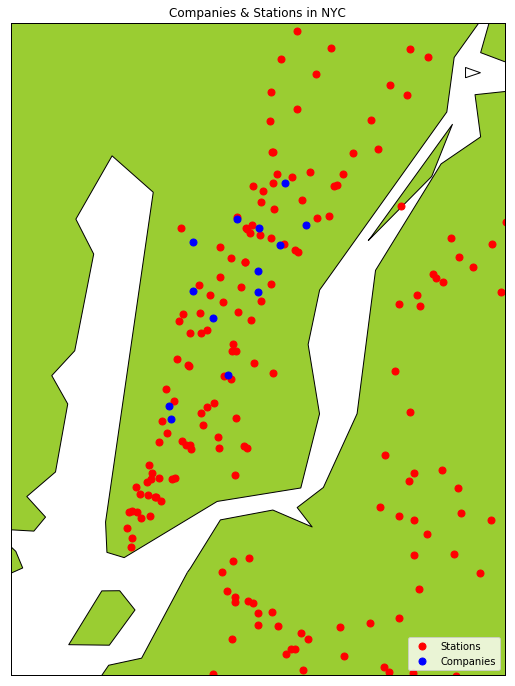

In [72]:
# plot all of the companies and all of the labels
NYC_map(comp_lat,comp_lon,comp_labels,sta_lat,sta_lon)


/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1709: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1712: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


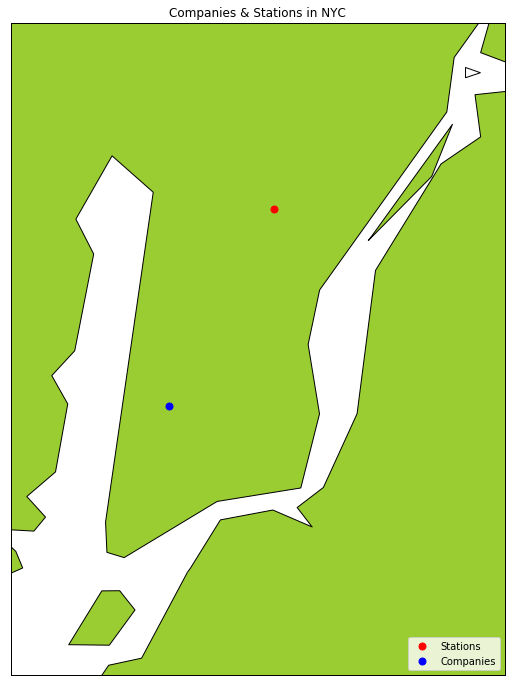

In [75]:
# plot just the 0th company and the 100th station

NYC_map(comp_lat[0],comp_lon[0],comp_labels[0],sta_lat[100],sta_lon[100])
